# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/MLProject_1/foodhub_order.csv')


In [6]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 Rows and 9 Columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Write your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
In the dataset, there are a total of 9 columns in which 4 are categorical and rest are numeric variables.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
None of the variables have missing data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The data summary shows that the food preparation time ranges from minimum of 20 minutes to maximum 35 minutes.
The average time of food preparation is 27.37 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
A total of 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# check unique order ID
df['order_id'].nunique()

1898

In [13]:
# check unique order ID
df['customer_id'].nunique()

1200

In [14]:
# check unique order ID
df['restaurant_name'].nunique()

178

In [15]:

# check unique order ID
df['cuisine_type'].nunique()

14

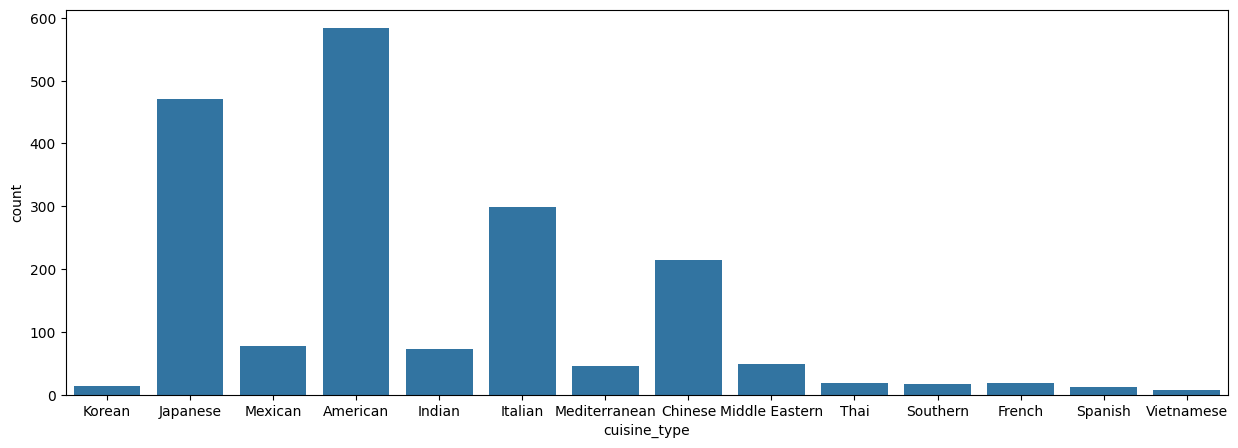

In [16]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type'); ## Create a countplot for cuisine type.

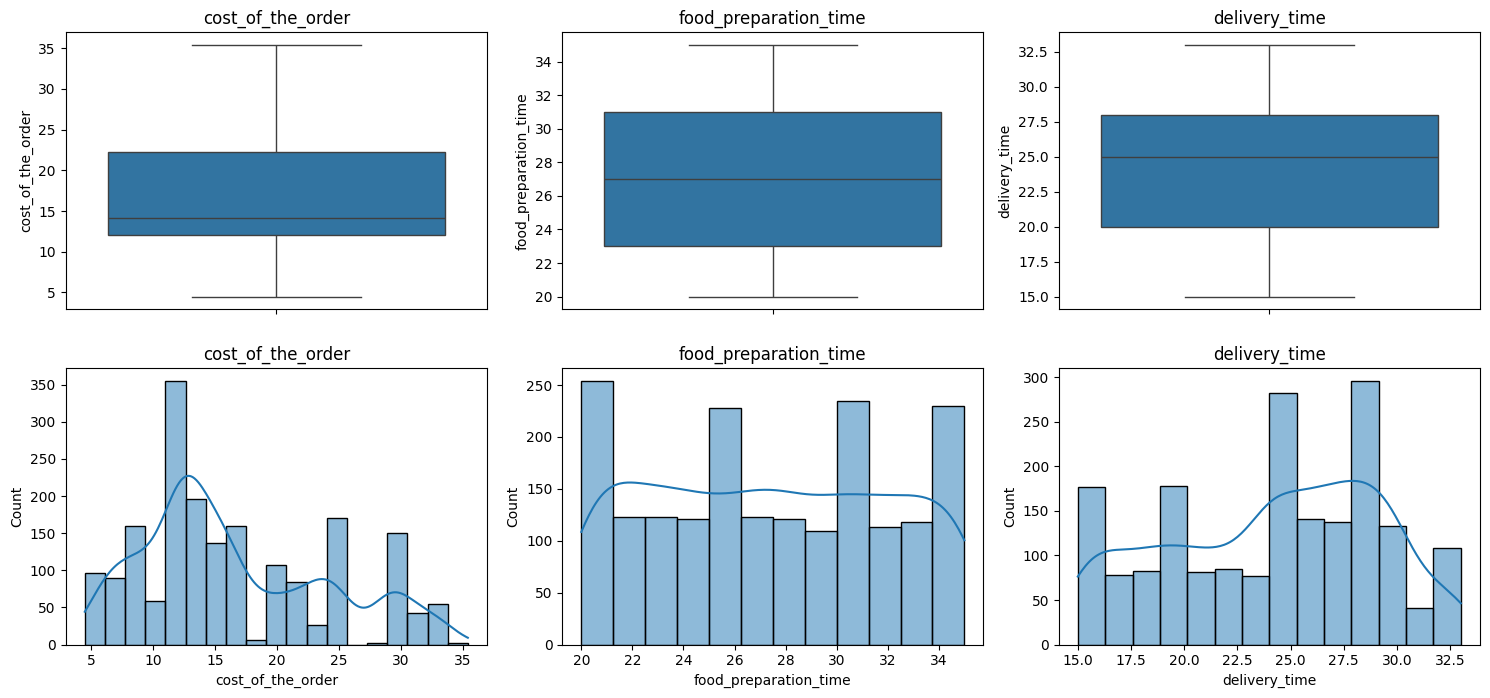

In [17]:
# List of numeric columns
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(15, 10))

# Boxplot visualization
for i, variable in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=variable, whis=1.5)
    plt.tight_layout()
    plt.title(variable)

# Histogram visualization
for i, variable in enumerate(numeric_cols):
    plt.subplot(3, 3, len(numeric_cols) + i + 1)
    sns.histplot(data=df, x=variable, kde=True)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation of Numeric Variables:
The histogram shows that the distribution of cost of the order is right skewed where as the distribution of delivery time is left skewed.\
The distribution of food preparation time seems to have more than one mode.

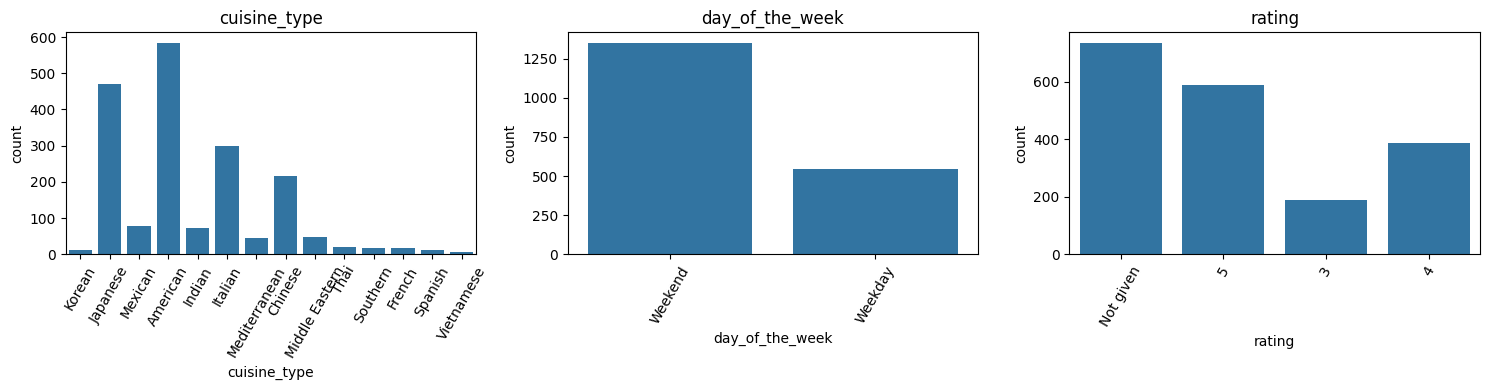

In [18]:
categorical_cols = ['cuisine_type', 'day_of_the_week', 'rating']

plt.figure(figsize=(15, 10))

# Countplot visualization for categorical variables
for i, variable in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=df, x=variable)
    ax.set_xticks(ax.get_xticks())  # Set x-axis tick positions
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)  # Rotate x-axis labels to 60 degrees
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations on Categorical Variables:
In the given dataset, American, Japanese and Italian cuisines are more popular than others. \
Weekends are more busy than the weekdays. \
More than one third of the orders were not rated. Among the rated orders, more 5 ratings than 4 or 3.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here

# Top 5 restaurant names
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants in terms of number of orders received:")
print(top_5_restaurants)

Top 5 restaurants in terms of number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


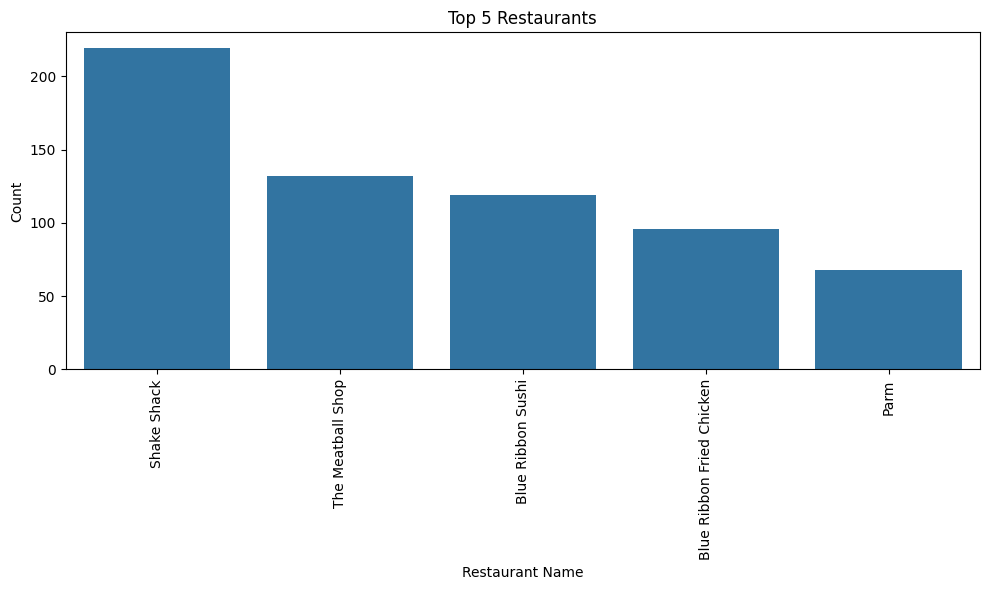

In [20]:
# Plot the countplot for top 5 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values)
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees for better readability
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Top 5 Restaurants')
plt.tight_layout()
plt.show()

#### Observations:
Among the restaurants that received the food orders, the top 5 are as follows:\
Shake Shack:                  219, \
The Meatball Shop:            132, \
Blue Ribbon Sushi:           119, \
Blue Ribbon Fried Chicken:     96, \
Parm:                          68.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Filter data for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Count of each cuisine type
cuisine_counts_weekend = weekend_data['cuisine_type'].value_counts()

# Find the most popular cuisine
most_popular_cuisine_weekend = cuisine_counts_weekend.idxmax()

print("The most popular cuisine on weekends is:", most_popular_cuisine_weekend)


The most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is: American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here

# Filter the DataFrame to include only orders with a cost greater than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The number of orders that cost above 20 dollars is 555 which is 29.24% of the total orders received.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here

# The mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
The average order delivery time is: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here
df['customer_id'].value_counts().head(3)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The top 3 most frequent customers who will be receiving the 20% discount by the company are as follows: \
customer_id: 52832, total orders: 13 \
customer_id: 47440, total orders: 10 \
customer_id: 83287, total orders: 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


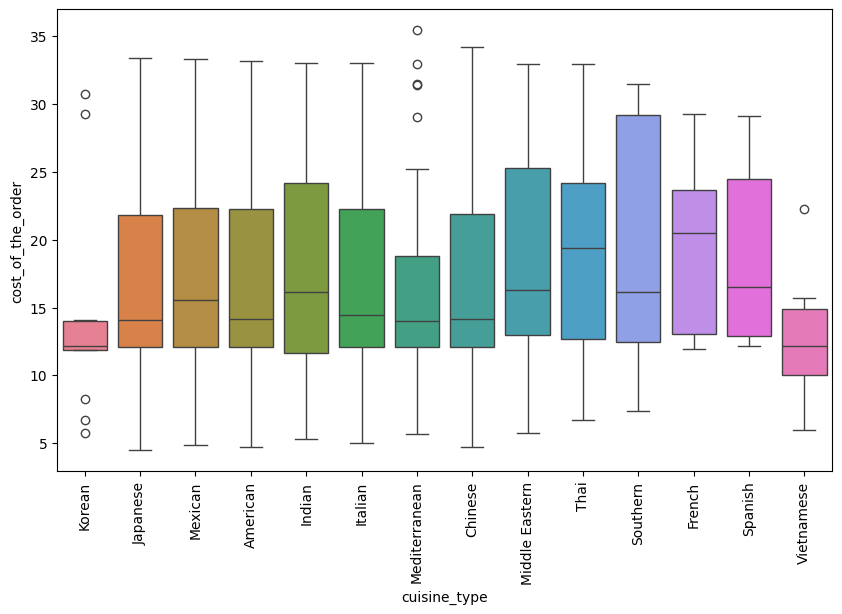

In [25]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(10,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, hue = "cuisine_type")
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The median cost of the orders for French, Thai and Indian cuisine types are higher than others. Korean, Mediterranean and Vietnamese cuisines have some outliers in the cost data.

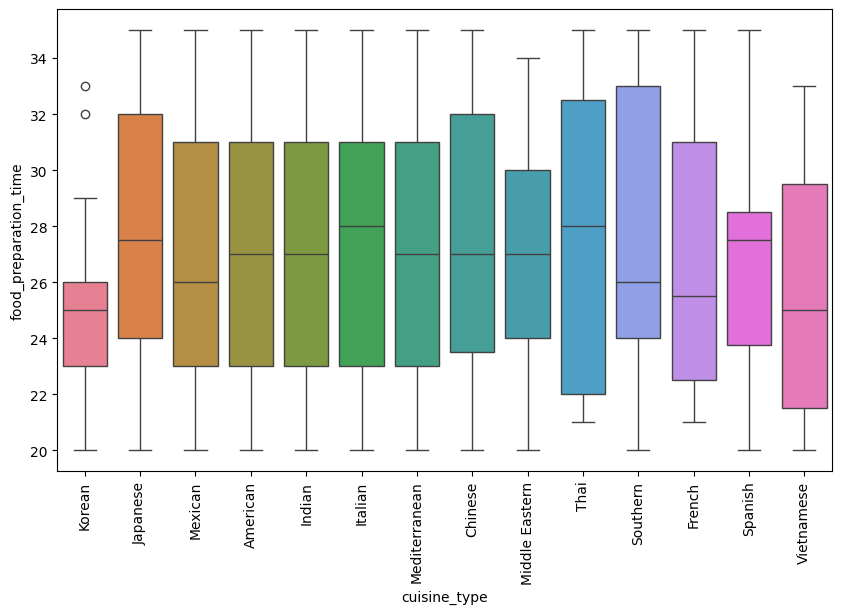

In [47]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,6))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, hue = "cuisine_type")
plt.xticks(rotation = 90)
plt.show()

#### Observations:
Japanese, Italian, and Thai cuisines are taking longer time of preparation than other types of cuisines.

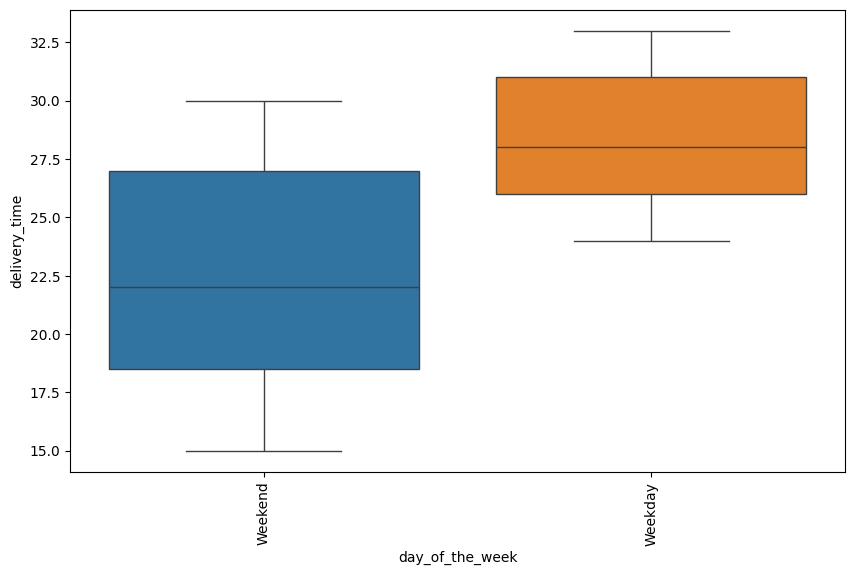

In [26]:
# Relationship between Day of the week and Delivery time
plt.figure(figsize=(10,6))
sns.boxplot(x ="day_of_the_week", y = "delivery_time", data = df, hue = "day_of_the_week")
plt.xticks(rotation = 90)
plt.show()

#### Observations:
Delivery time during the weekend is less than the Weekdays. About 75% of the orders are delivered within 27 minutes in the weekend where as about 60% of the orders are delivered after 27 minutes during the Weekdays.

In [27]:
# Revenue Generated by the Restaurants
revenue_restaurant = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)
revenue_restaurant

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:
Out of the 14 restaurants in the study, only 5 restaueants have received orders more than 1000 dollars in total.

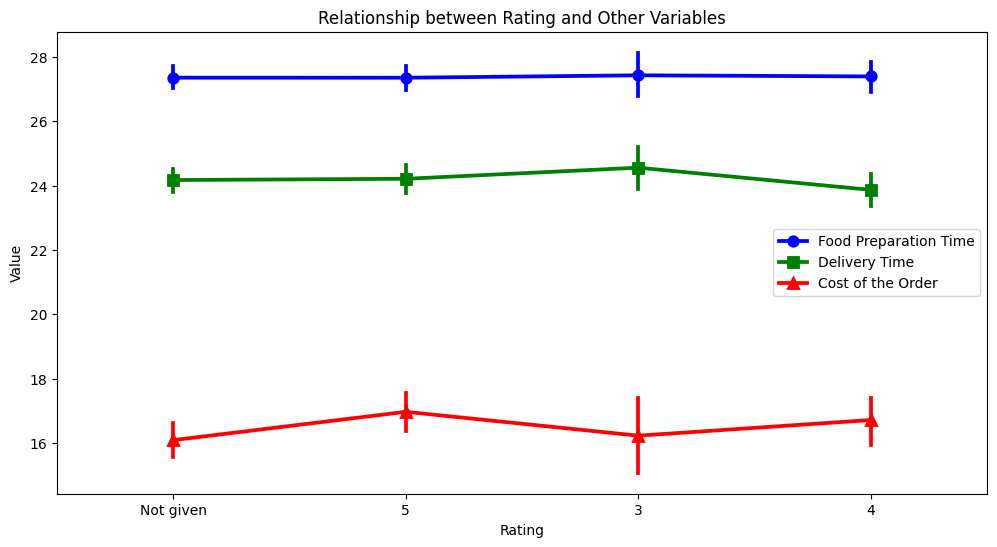

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_mean_4 contains the filtered data with rating count > 50
# First, set up the figure and axis
plt.figure(figsize=(12, 6))

# Create point plots for each variable
sns.pointplot(x='rating', y='food_preparation_time', data=df, color='blue', markers='o', label='Food Preparation Time')
sns.pointplot(x='rating', y='delivery_time', data=df, color='green', markers='s', label='Delivery Time')
sns.pointplot(x='rating', y='cost_of_the_order', data=df, color='red', markers='^', label='Cost of the Order')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Value')
plt.title('Relationship between Rating and Other Variables')

# Add legend
plt.legend()

# Show plot
plt.show()


#### Observations:
Both the Food preparation and delivery times were rated almost similarly. Higher ratings were received for costly orders.  

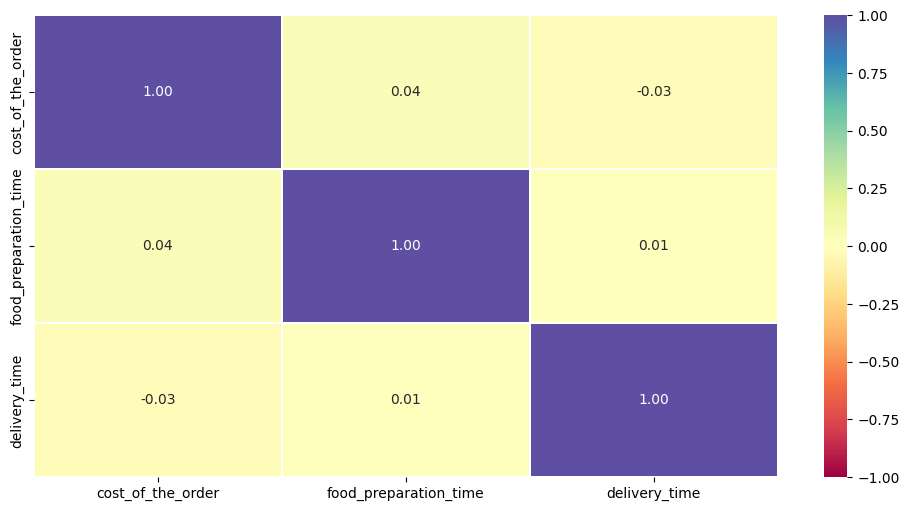

In [29]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(12, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", linewidths = 0.05)
plt.show()

#### Observations:
No strong correlations were observed between the cost of the orders, preparation time and delivery times.

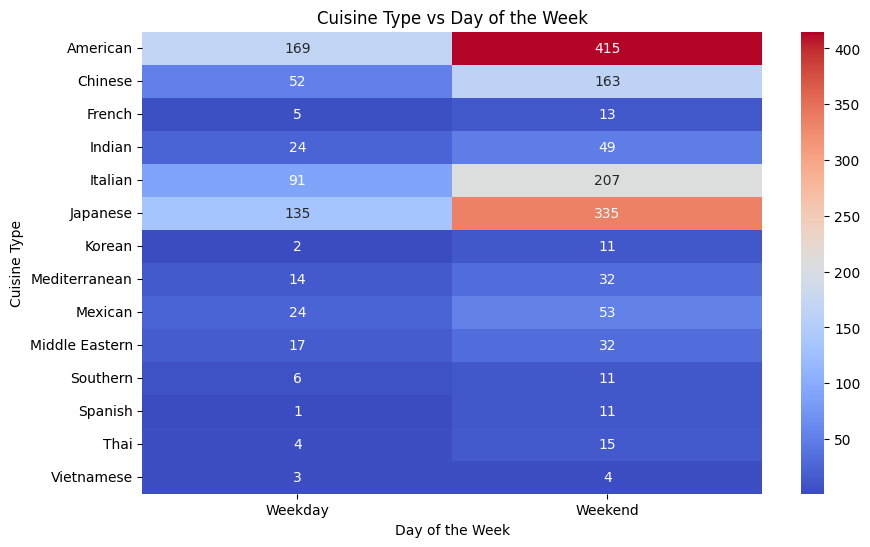

In [30]:
# Create a contingency table
contingency_table = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cuisine Type vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.show()

#### Observations:
American, Japanese and Italian cuisines are more popular in the weekend as well as in the Weekdays.

In [48]:
# Change the datatype for rating by replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Convert the column to integer type
df['rating'] = df['rating'].astype('Int64')


In [49]:
# Calculate total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


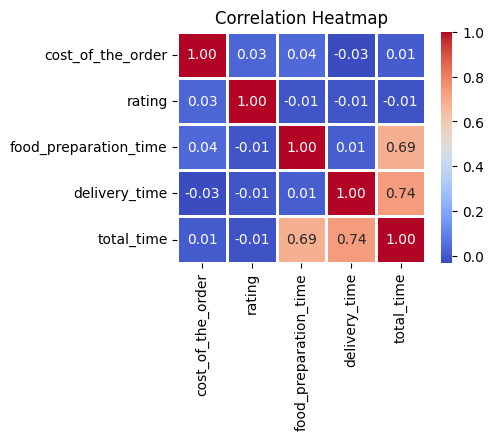

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df[['cost_of_the_order', 'rating',
       'food_preparation_time', 'delivery_time', 'total_time']]

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()


#### Observations:
After converting the ratings into numeric variables, the correlation matrix shows no strong correlation among total times, cost and ratings.

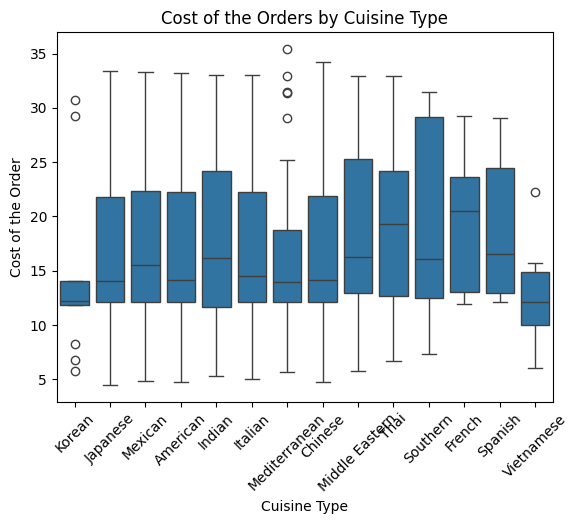

ANOVA results:
F-statistic: 1.5187920067713478
p-value: 0.10297914806289048


In [51]:

# One way ANOVA for Cuisine Type and Cost of Order

# Visualization - Box plot
# plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cost of the Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Statistical test - ANOVA
from scipy.stats import f_oneway

# Extract order costs for each cuisine type
cuisine_groups = [group['cost_of_the_order'] for name, group in df.groupby('cuisine_type')]
cuisine_groups
# Perform ANOVA
f_statistic, p_value = f_oneway(*cuisine_groups)
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


#### Observations:
The one way ANOVA test showed that there is a significant difference among the cuisine types with the cost of the orders.

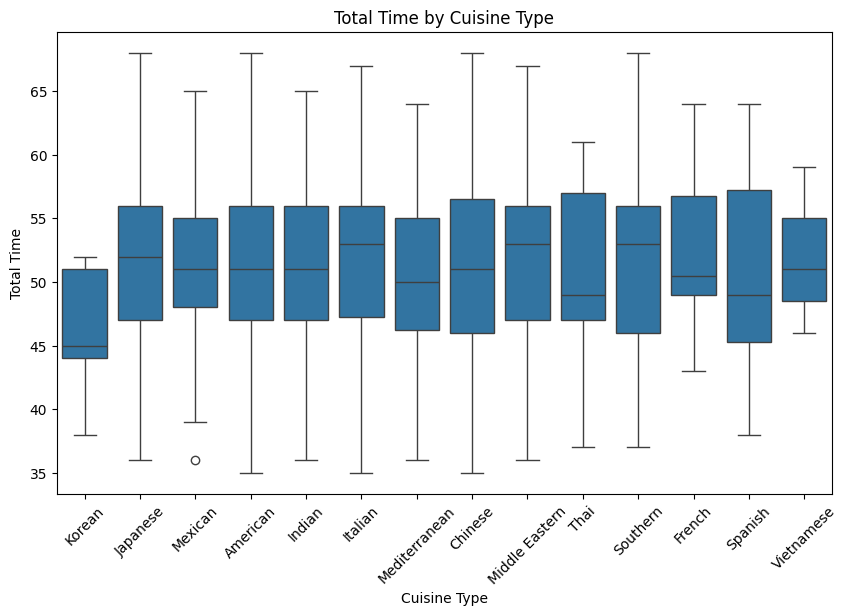

ANOVA results:
F-statistic: 0.9593344543296469
p-value: 0.4898116278423661


In [38]:
# One way ANOVA for Cuisine Type and Total Time

# Visualization - Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='total_time')
plt.title('Total Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Statistical test - ANOVA
from scipy.stats import f_oneway

# Extract order costs for each cuisine type
cuisine_groups = [group['total_time'] for name, group in df.groupby('cuisine_type')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*cuisine_groups)
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


#### Observations:
The one way ANOVA test showed that there is a significant difference among the cuisine types with the total time taken.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [39]:
# Write the code here

# Filter the ratings without the Not Rated
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert the ratings into Numeric type
df_rated ['rating']= df_rated['rating'].astype(int)

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
print(df_rating_count.shape)

(156, 2)


In [40]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
mean_ratings = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
mean_ratings['rating'] = mean_ratings['rating'].round(2)
print(mean_ratings.head())


             restaurant_name  rating
0          The Meatball Shop    4.51
1  Blue Ribbon Fried Chicken    4.33
2                Shake Shack    4.28
3          Blue Ribbon Sushi    4.22


#### Observations:

A total of 156 restaurants were rated of which 7 of them  received more than 50 ratings. Only 4 restaurants  received more than 50 rating coutns with an average ratings of more than 4.0. The following restaurants will be qualified as per the company criteria to receive the advertisement promotions.\

The Meatball Shop (average ratings)    4.51\
Blue Ribbon Fried Chicken (average ratings)    4.33\
Shake Shack (average ratings)    4.28\
Blue Ribbon Sushi (average ratings)    4.22

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

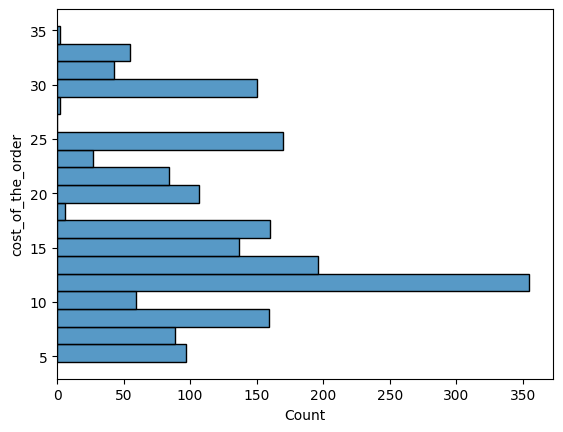

In [41]:
sns.histplot(data = df, y ='cost_of_the_order');

In [42]:
df[df['cost_of_the_order']<5].count()

order_id                 9
customer_id              9
restaurant_name          9
cuisine_type             9
cost_of_the_order        9
day_of_the_week          9
rating                   7
food_preparation_time    9
delivery_time            9
total_time               9
dtype: int64

In [43]:
# Define the commission rates
commission_25 = 0.25  # 25% commission for orders with cost > 20 dollars
commission_15 = 0.15  # 15% commission for orders with cost > 5 dollars

# Calculate revenue from orders with cost > 20 dollars
revenue_25 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * commission_25

print("Revenue generated from the orders higher than $20", round(revenue_25.sum(),2))

# Calculate revenue from orders with cost between 5 and 20 dollars
revenue_15 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * commission_15
print("Revenue generated from the orders more than $5 and less or equal to $ 20 is: ", round(revenue_15.sum(), 2))

# Calculate total revenue
total_revenue = revenue_25.sum() + revenue_15.sum()

print("Net revenue generated by the company on the orders ranging from $5 and higher:", round(total_revenue, 2))


Revenue generated from the orders higher than $20 3688.73
Revenue generated from the orders more than $5 and less or equal to $ 20 is:  2477.58
Net revenue generated by the company on the orders ranging from $5 and higher: 6166.3


#### Observations:
Revenue generated from the orders higher than $20 is 3688.7275

Revenue generated from the orders in between $5 and 20 is 2477.5755

Net revenue generated by the company on the orders ranging from $5 and higher: 6166.303\
A total of 9 orders are not included in the revenue calculation as they are under 5 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
# Write the code here

# Total time for each order (order recived to get delivered)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the mean delivery time for weekdays and weekends
mean_total_time = pd.DataFrame(df.groupby('day_of_the_week')['total_time'].mean().round(2))
print(f" The average of total time by day of the week:\n {mean_total_time}")

# Orders taking 60 minutes to get delivered
orders_60 = df[df['total_time'] > 60]

# Percentage of orders that take more than 60 minutes
percentage_orders_60 = (len(orders_60) / len(df)) * 100
print("")
print(f"Percentage of orders taking more than 60 minutes: {percentage_orders_60:.2f}%")


 The average of total time by day of the week:
                  total_time
day_of_the_week            
Weekday               55.55
Weekend               49.91

Percentage of orders taking more than 60 minutes: 10.54%


In [45]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Calculate percentage of orders taking more than 60 minutes for weekdays
weekday_orders_60 = orders_60[df['day_of_the_week'] == 'Weekday']
percentage_weekday_orders_60 = (len(weekday_orders_60) / len(df[df['day_of_the_week'] == 'Weekday'])) * 100

# Calculate percentage of orders taking more than 60 minutes for weekends
weekend_orders_60 = orders_60[df['day_of_the_week'] == 'Weekend']
percentage_weekend_orders_60 = (len(weekend_orders_60) / len(df[df['day_of_the_week'] == 'Weekend'])) * 100

print(f"Percentage of orders taking more than 60 minutes on weekdays: {percentage_weekday_orders_60:.2f}%")
print(f"Percentage of orders taking more than 60 minutes on weekends: {percentage_weekend_orders_60:.2f}%")


Percentage of orders taking more than 60 minutes on weekdays: 21.76%
Percentage of orders taking more than 60 minutes on weekends: 6.00%


#### Observations:
Analyzing the total time required to deliver the food from the time the order is received to the order get delivered, 10.54% of the orders took more than 60 minutes.

During the weekdays 21.76% of the orders take more than 60 minutes but only 6% during the weekends.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [46]:
# Write the code here

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time = pd.DataFrame(df.groupby('day_of_the_week')['delivery_time'].mean().round(2))

print(mean_delivery_time)



                 delivery_time
day_of_the_week               
Weekday                  28.34
Weekend                  22.47


#### Observations:
The average delivery time during the weekdays is about 6 minutes longer than than during the weekends. The average delivery time for the weekdays and weekends are as follows:\
Weekday average delivery time: 28.34 minutes\
Weekend average delivery time: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* A dataset consisting of 1898 food orders from 178 different restaurants and 14 different cuisines ordered by 1200 customers were analyzed.
* Right skewed distribution of cost orders, and left skewed of delivery time were observed
* Among the different cusisine type American, Japanese and Italian were found to be more popular
* More orders were received during the weekends than on Weekdays.
* More than one third of the orders were not given any ratings.
* More than 29% of the orders were higher than $20.
* Top restaurants reveiving more than 100 roders were
  * Shake Shack: 		219
  * The Meatball Shop:		132
  * Blue Ribbon Sushi:		119
* Most frequent customers IDs were
  * 52832  	with orders		13
  * 47440   with orders 	10
  * 83287   with orders  	 9

* No strong correlation among preparation time, delivery time and cost of the order.
* Not a significant difference on ratings with time taken and cost of the food.

* A significant difference was found in the type of cuisines and cost of orders as well as the total time taken.

* A higher rate of commission (25% on the orders of 20 dollars or more) generated more revenue for the company compared to the lower rate commission (15% on the orders of less than 20 dollars).

* Higest revenue generating restaurant Shake Shack has reveiced lower average customer ratings than some of the other top 5 restaurants.
* The restaurant Parm which is one of the top 5 revenue generating one was receiving average rating less than 4.

* A total of 10.54% of the orders took more than 60 minutes of total time. Of which Weekdays are much higher than Weekends.
* Overall the average time in the Weekdays is about 6 minutes longer than Weekends.



### Recommendations:

#### The following recommendations are made for further analysis on larger dataset over time

##### 1. Customer Satisfaction:
Analyze rating distributions, trends by cuisine and restaurant, and correlations between service times and ratings to gauge overall satisfaction and detect service quality issues effectively.
  
##### 2. Operational Efficiency:
Examine preparation and delivery time distributions, explore day-wise delivery times, and investigate the relationship between service times and order costs to optimize resource allocation and improve efficiency.
  
##### 3. Restaurant Performance Evaluation:
Evaluate order and revenue distributions, analyze the impact of ratings on satisfaction and loyalty, and explore collaboration opportunities with top-performing restaurants for business growth.
  
##### 4. Customer Segmentation and Targeting:
Segment customers based on behavior and demographics, personalize recommendations and offers, and incentivize high-value segments to increase customer value effectively.
  
##### 5. Predictive Analytics and Forecasting:
Develop predictive models for demand forecasting and resource optimization, utilize predictive analytics to anticipate customer preferences and operational trends, and proactively adjust operations based on forecasts for better planning and decision-making.

---